In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [35]:
# Importing functions from the above library
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier # KNN Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [3]:
# Upload dataset - Zoo.csv
#Reading our dataset
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df['type'].value_counts(sort='ascn')

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


# **01. EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [8]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


# **02. Visualizations**

<Figure size 1000x1500 with 0 Axes>

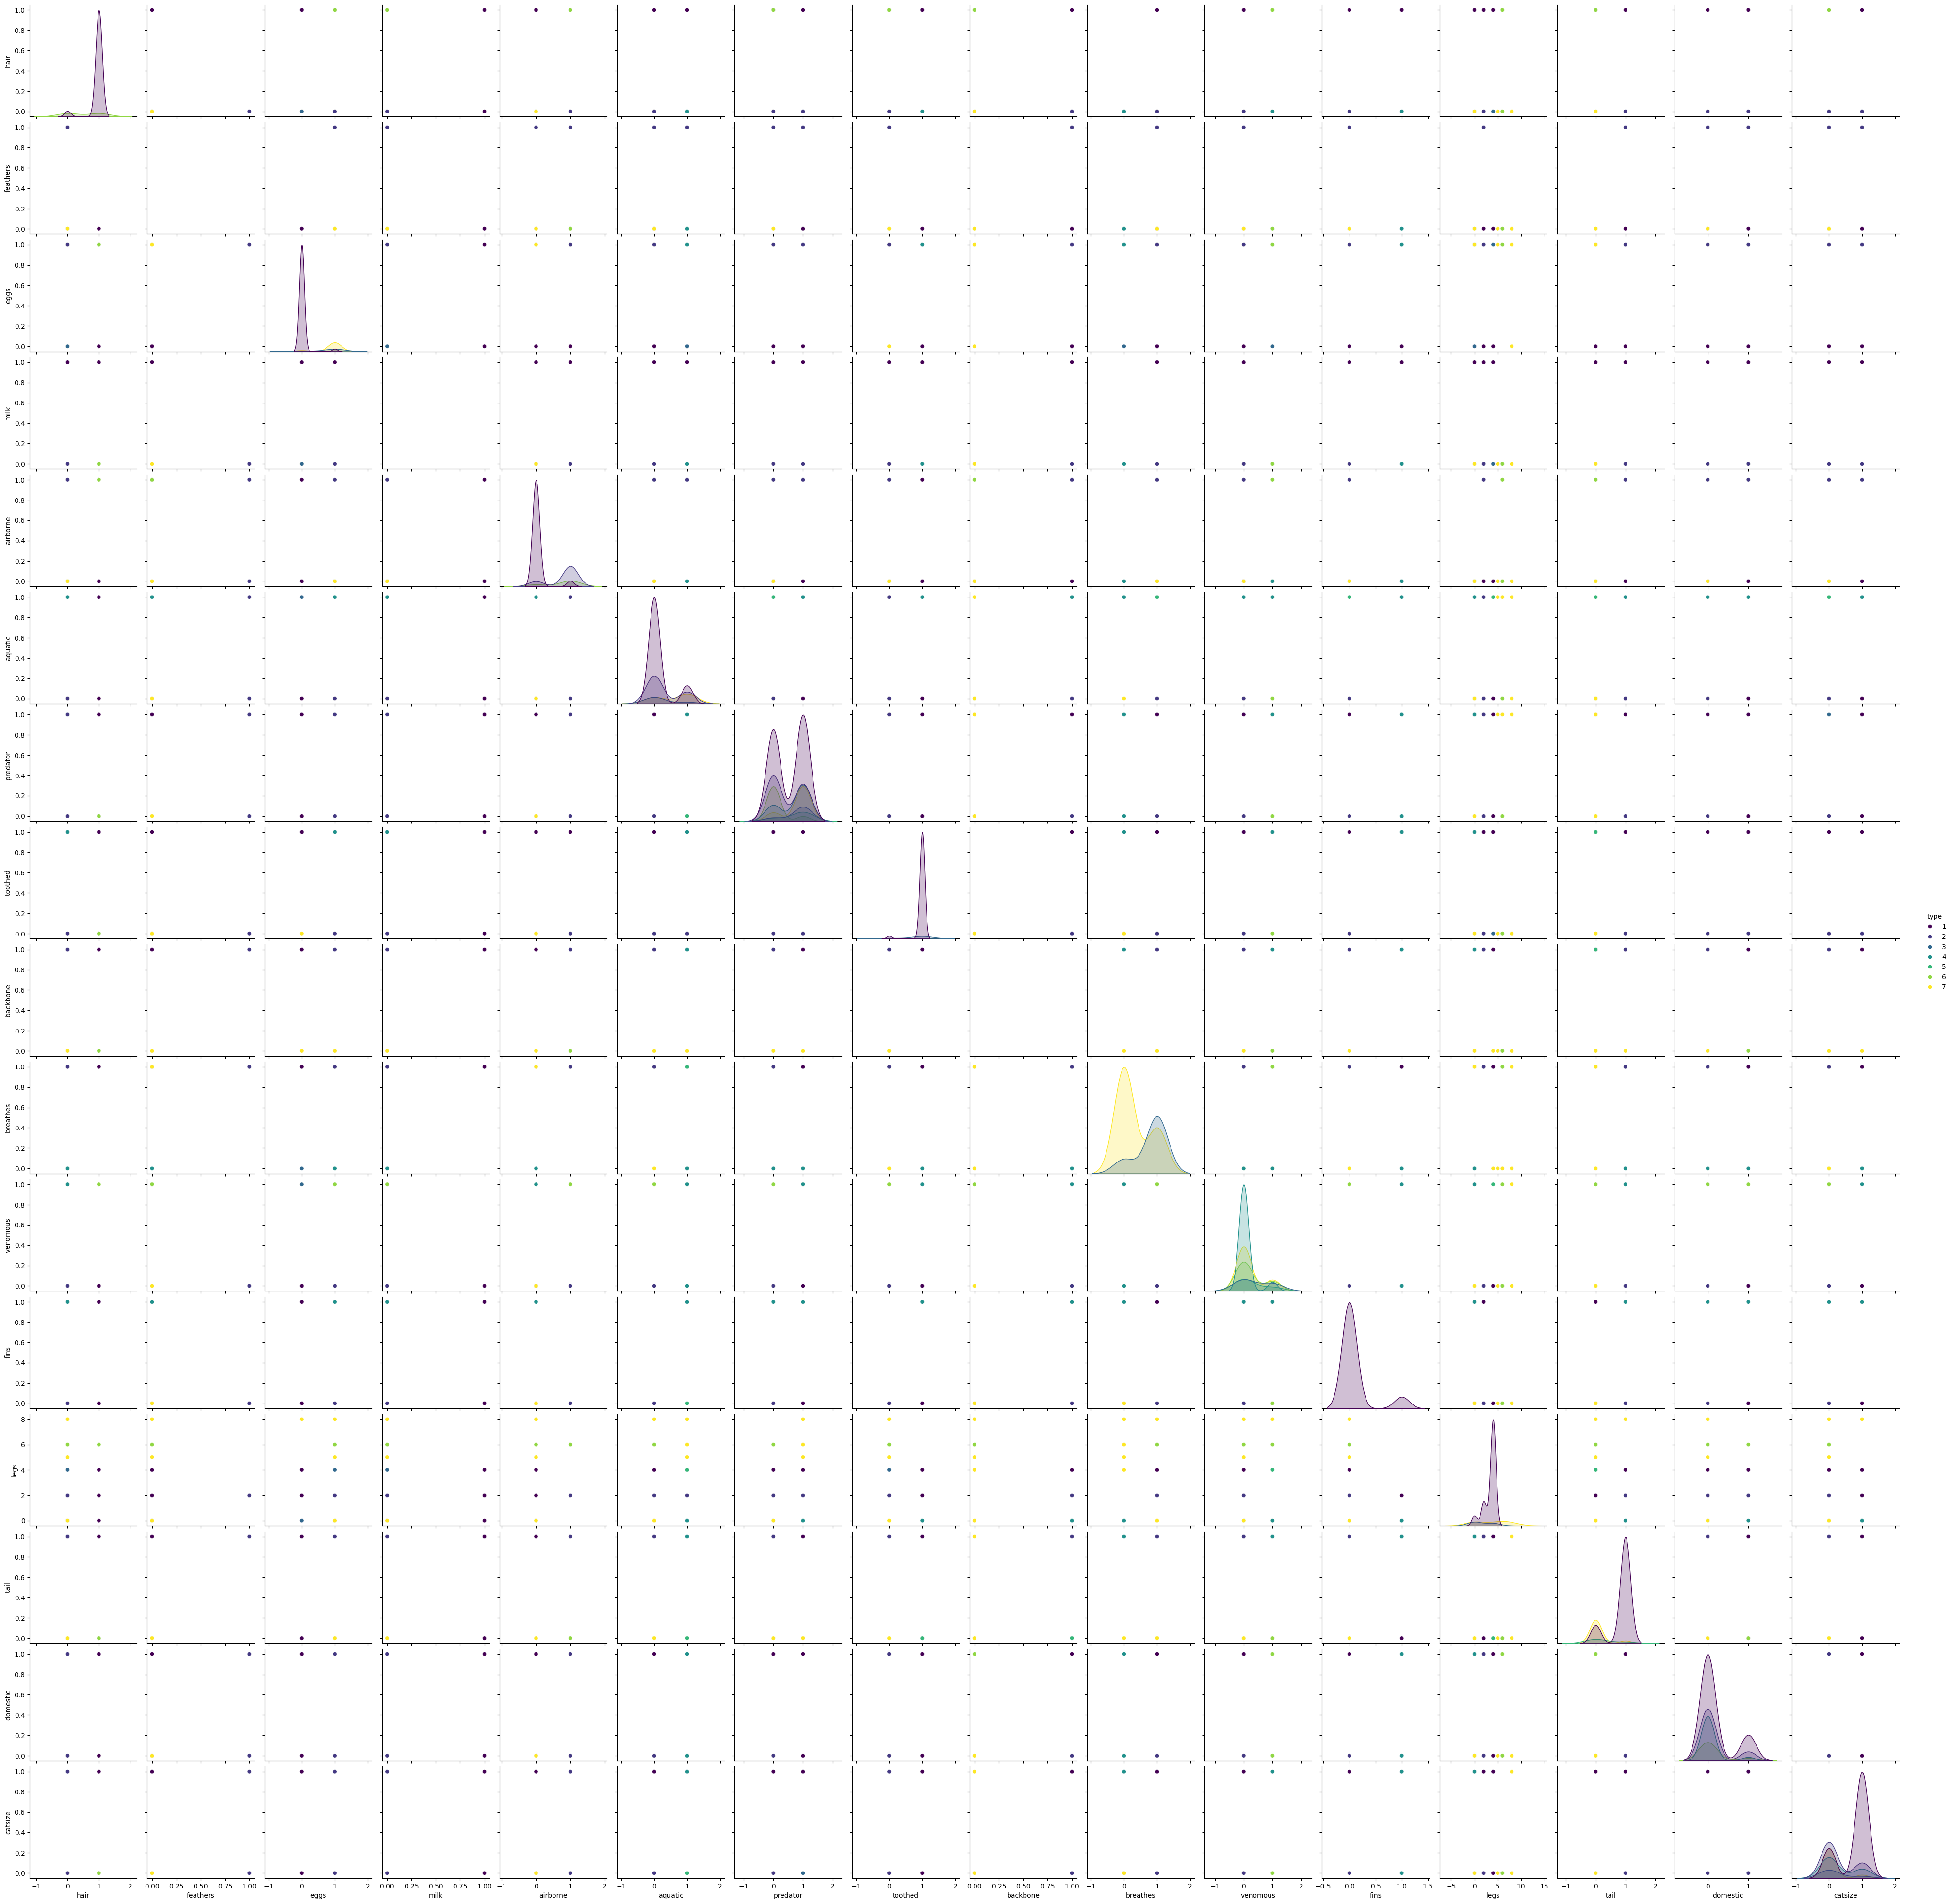

In [9]:
plt.figure(figsize=(10, 15))
sns.pairplot(df, hue='type',palette='viridis')
plt.show()

In [10]:
df.corr(numeric_only=True)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


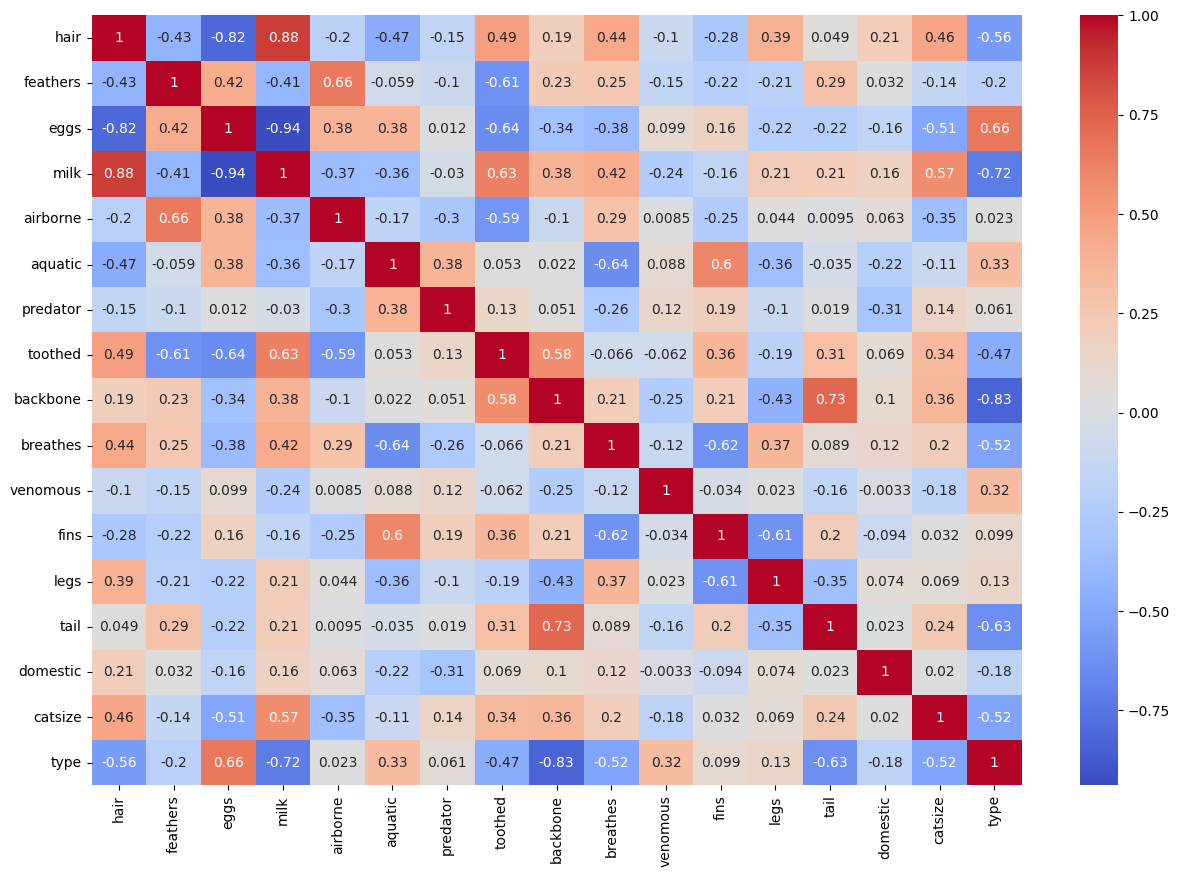

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

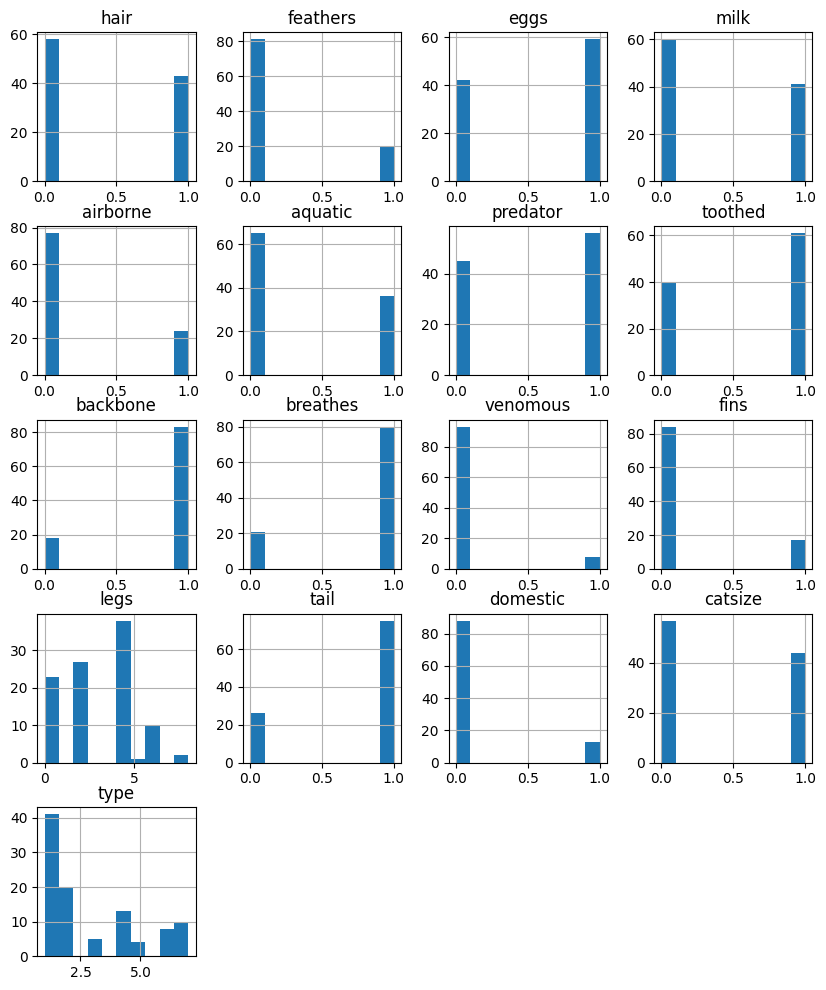

In [12]:
df.hist(figsize=(10, 12))
plt.show()

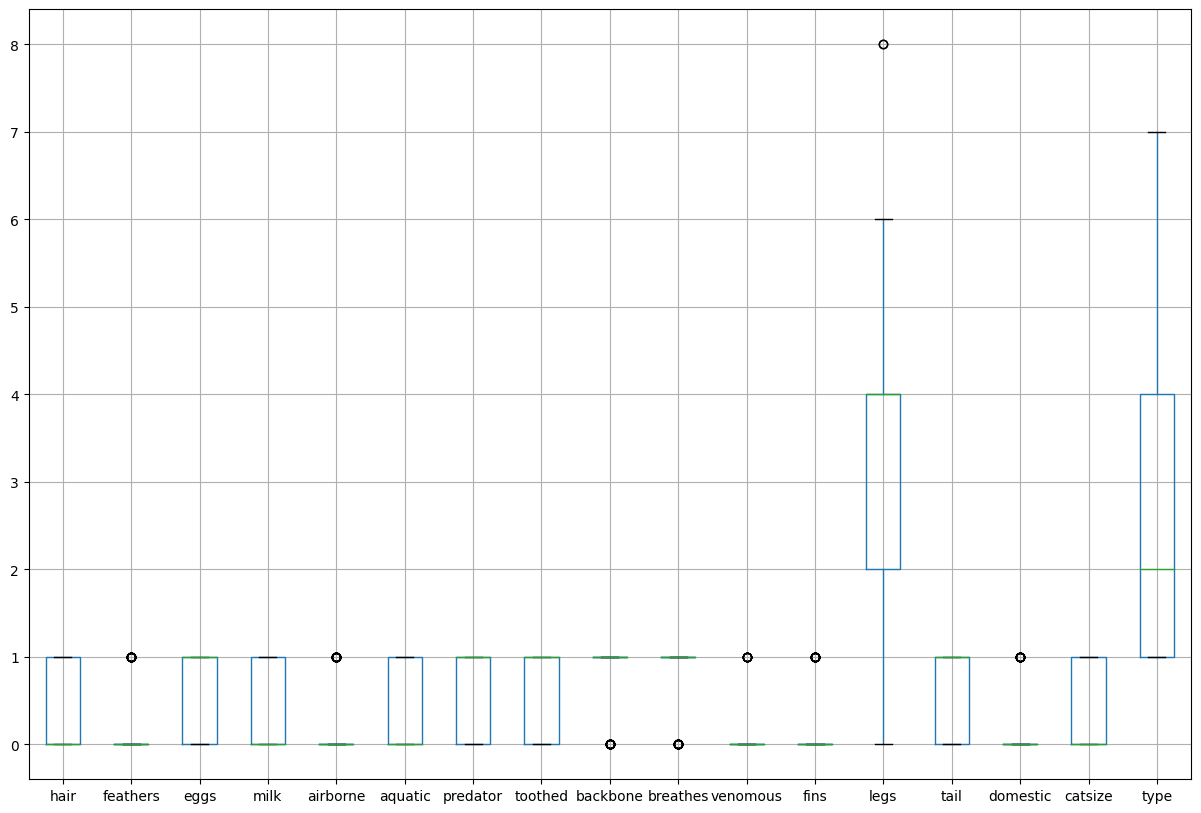

In [13]:
df.boxplot(figsize=(15, 10))
plt.show()

In [14]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
# Performing Label Encoding on the categorical data
le = LabelEncoder()
df['animal name'] = le.fit_transform(df['animal name'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


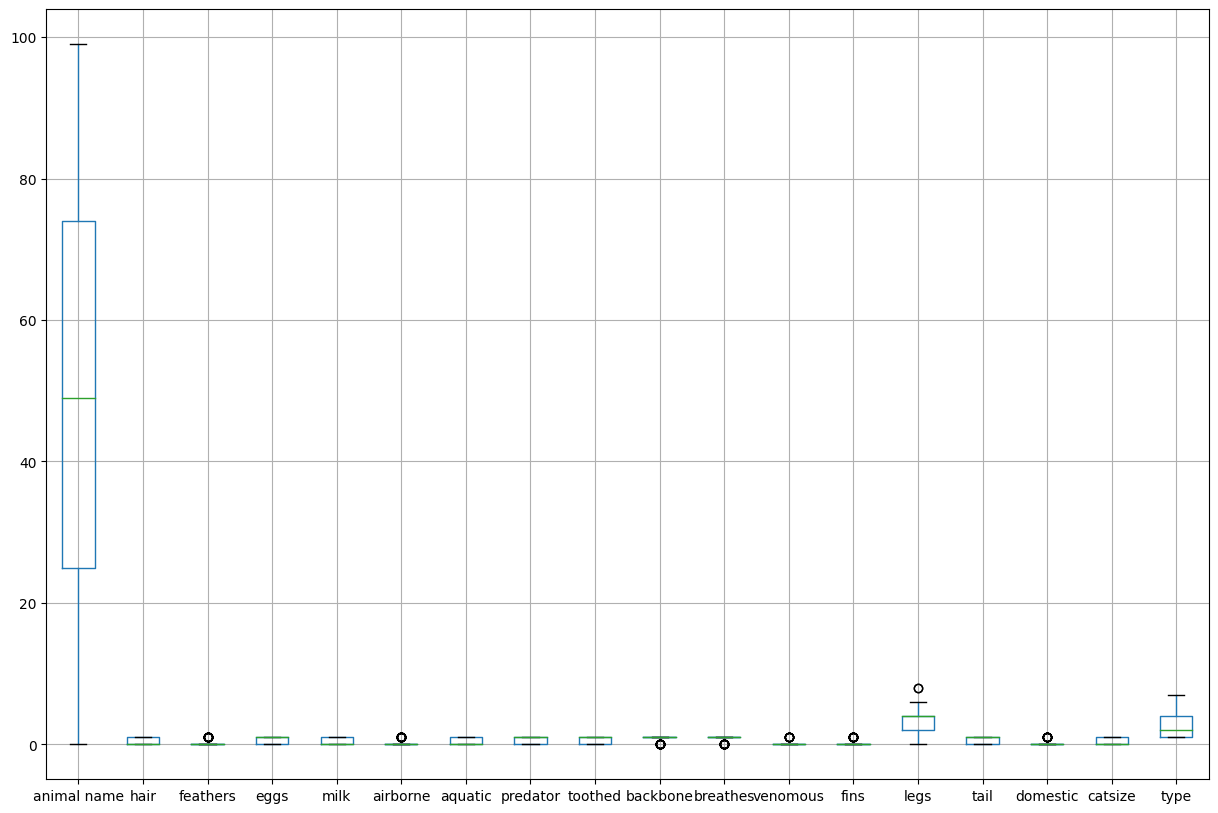

In [16]:
df.boxplot(figsize=(15, 10))
plt.show()

In [17]:
# treating the outlier
# Steps to remove outliers through inter quartile range (IQR)
# 1. Calculate the IQR
# 2. Define the lower and upper bound
# 3. Filter the DataFrame

In [18]:
# Calculate Q1 and Q3
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)


# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
# Any value that falls below lower bound or above upper bound are outliers
# ~ sign is used to negate the boolean sign as [df_train < lower_bound] OR [df_train > upper_bound] give true values
data = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Display the cleaned DataFrame
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
10,10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
22,22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
25,25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
28,27,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


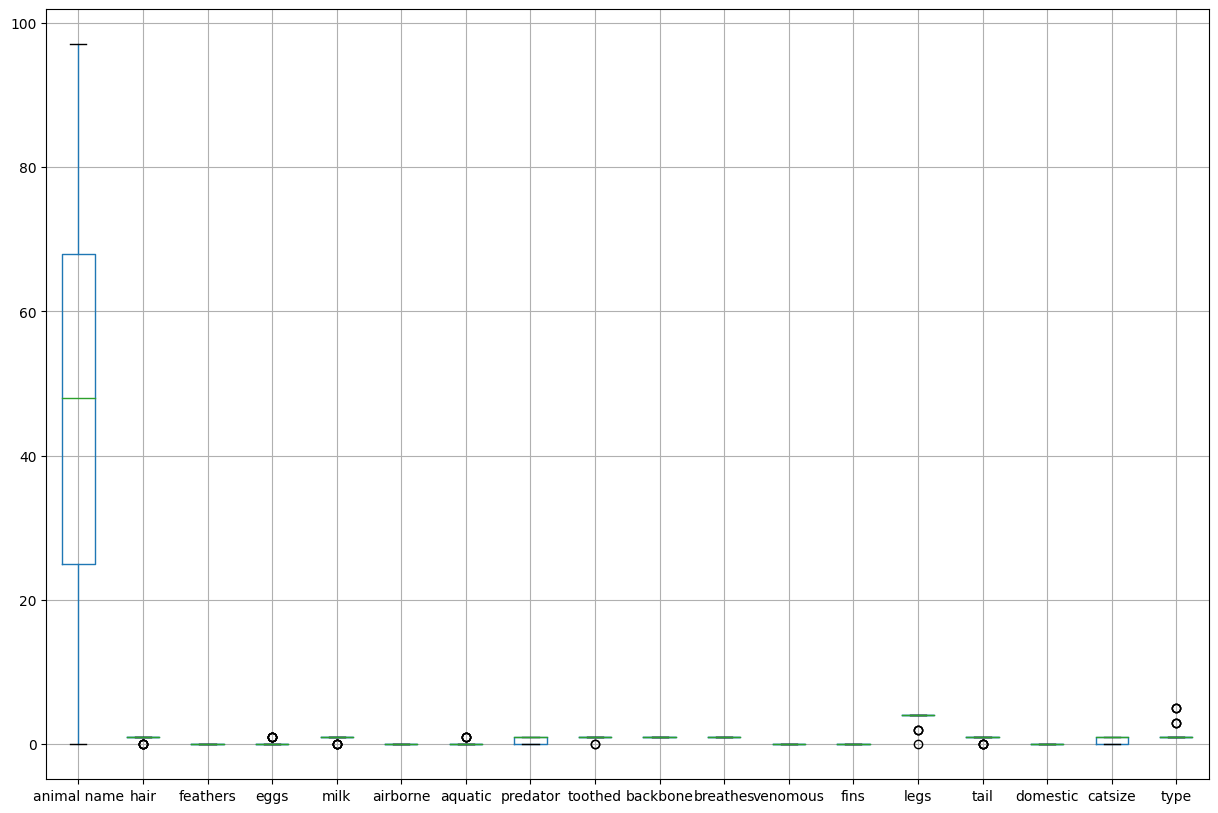

In [19]:
data.boxplot(figsize=(15, 10))
plt.show()

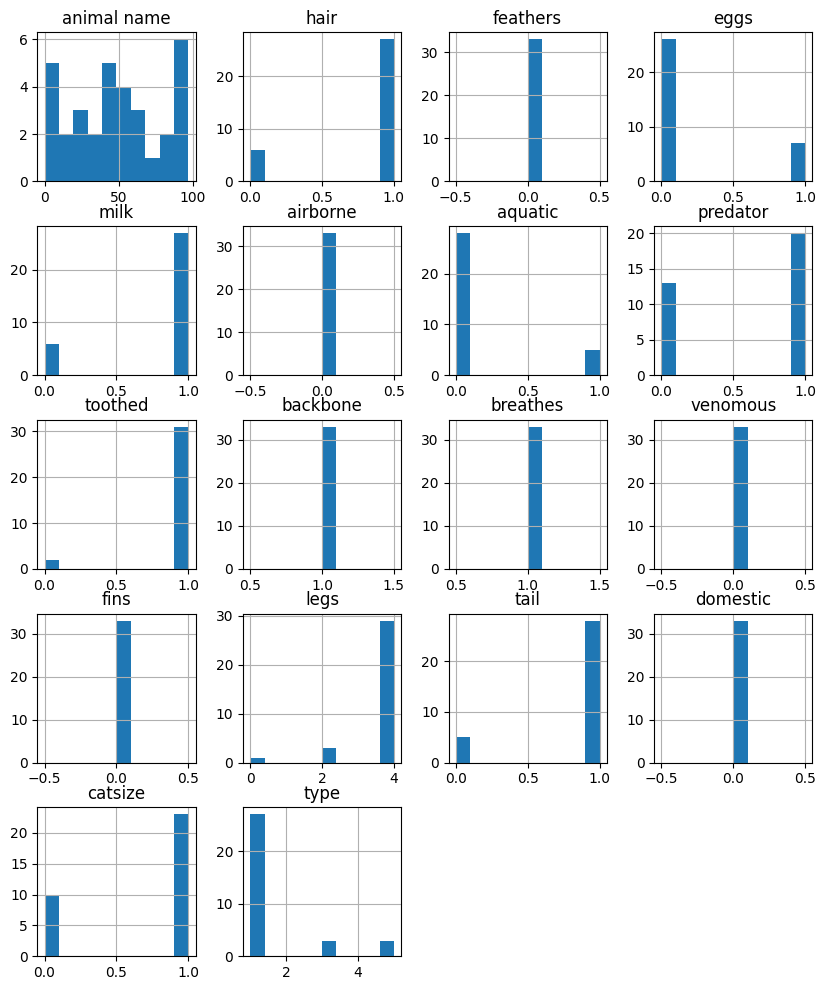

In [20]:
data.hist(figsize=(10, 12))
plt.show()

In [21]:
# As there weren't many outliers to start with and performing outlier preocessing is not helping the data we will continue with the original dataset
# - df that we had encoded before the outlier treatment.

# **03. Building Model**

In [22]:
# Splitting the data into independant variables and target variable
x = df.drop(['type'], axis=1)
y = df['type']

In [23]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Implementing the KNN algorithm and building the model
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [26]:
# Predicting on the testing dataset
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

# **04. Evaluating The model**

In [27]:
# Printing the classification report that has the accurarcy, recall, precision and F11 score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [28]:
# n_neighbours = 5 => Accurarcy = 0.43, Precision = 0.56, recall = 0.75, f1-score = 0.64
# n_neighbours = 10 => Accurarcy = 0.52, Precision = 0.62, recall = 0.83, f1-score = 0.71
# n_neighbours = 20 => Accurarcy = 0.48, Precision = 0.56, recall = 0.83, f1-score = 0.67
# n_neighbours = 15 => Accurarcy = 0.48, Precision = 0.59, recall = 0.83, f1-score = 0.69
# Therefore n_neighbours = 10 is the best value

In [29]:
# Trying out different metrics
# Metric = euclidean => Accurarcy = 0.52, Precision = 0.62, recall = 0.83, f1-score = 0.71
# Metric = manhattan => Accurarcy = 0.67, Precision = 0.85, recall = 0.92, f1-score = 0.88
# Metric = chebyshev => Accurarcy = 0.48, Precision = 0.59, recall = 0.83, f1-score = 0.69
# Therefore metric = manhattan is the best value
# After scaling the x values the values have been modified to -
# Metric = manhattan => Accurarcy = 0.95, Precision = 1, recall = 1, f1-score = 1

In [30]:
# Printing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


# **05. Visualizing the decision boundary**

In [31]:
# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [45]:
# Train KNN classifier
knn_pca = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_pca.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [46]:
# Predicting on the testing dataset
y_pred_pca = knn_pca.predict(X_test)
y_pred_pca

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [47]:
# Printing the classification report that has the accurarcy, recall, precision and F11 score
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [48]:
# n_neighbours = 10 => Accurarcy = 0.71, Precision = 1, recall = 0.92, f1-score = 0.96, Using Metric = manhattan
# n_neighbours = 5 => Accurarcy = 0.86, Precision = 1, recall = 1, f1-score = 1, Using Metric = manhattan
#  n_neighbours = 5 => Accurarcy = 0.95, Precision = 1, recall = 1, f1-score = 1, Using Metric = euclidean

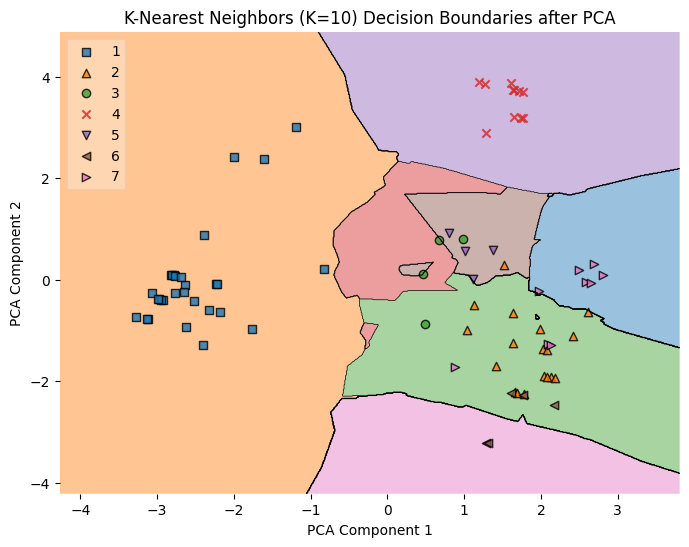

In [49]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train.values, clf=knn_pca, legend=2)
plt.title("K-Nearest Neighbors (K=10) Decision Boundaries after PCA")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Q1. What are the key hyperparameters in KNN?

A. The performance of KNN is significantly influenced by several key hyperparameters.



1.   Number of Neighbors (n_neighbors) - small values are sensitive to noice and potentially overfit to data, large values are too generalized and may underfit the data.
2.   Distance Metric (metric) - Euclidean Distance, Manhattan Distance, Minkowski Distance, Chebyshev Distance, Cosine Similarity
3.  Weight Function (weights) - 'auto', 'ball_tree', 'kd_tree', 'brute'
4.  Leaf Size (leaf_size) - smaller leaf size may leadd to more accurate but slower results, larger leaf size can speed up the search process but may reduce accuracy.
5.  Metric Parameters (metric_params)



Q2. Metric Parameters (metric_params)

A.  In K-Nearest Neighbors (KNN), distance metrics are used to measure the similarity or dissimilarity between data points. Several distance metrics can be employed in KNN, depending on the nature of the data and the problem domain. Some common distance metrics used in KNN include: Euclidean distance,Manhattan distance (City block distance or L1 distance),Minkowski distance,Chebyshev distance,Cosine similarity